In [1]:
import pandas as pd
import sys
import os
import numpy as np


In [14]:
df = pd.read_csv('merged_kpi_dataset_v3.csv')

In [15]:
df_ID = pd.read_csv('SK_ID_70K.csv')

In [16]:
common_ids = df_ID['SK_ID_CURR'].unique()
df_7k = df[df['SK_ID_CURR'].isin(common_ids)].copy()

In [17]:
df_7k.shape

(72793, 42)

In [38]:
df_7k.isnull().sum()

SK_ID_CURR                           0
EXT_SOURCE_1                         0
EXT_SOURCE_2                         0
EXT_SOURCE_3                         0
TARGET                               0
CC_90PLUS                            0
AVG_CARD_USAGE_MONTHS                0
AVG_UTIL_RATIO                       0
AVG_MIN_PAY_RATIO                    0
AVG_REPAY_RATIO                      0
CREDIT_CARD_HISTORY_YEARS            0
INST_90PLUS                          0
avg_payment_delay                    0
pct_underpaid                        0
pct_full_payments                    0
LOAN_HISTORY_YEARS                   0
IS_LONG_TERM_LOAN                    0
IS_HIGH_INTEREST                     0
LOAN_HISTORY_YEARS(prev)             0
NUM_POS_APPLICATIONS                 0
NUM_CASH_APPLICATIONS                0
NUM_REVOLVING_APPLICATIONS           0
REFUSAL_RATE                         0
bureau_IS_ACTIVE_ESTIMATED           0
bureau_IS_CLOSED_ACTUAL              0
bureau_DAYS_CREDIT_ENDDAT

In [19]:
null_cols = df_7k.isnull().sum()
cols_with_null = null_cols[null_cols > 0].index.tolist()
print(cols_with_null)

['bureau_DAYS_CREDIT_ENDDATE', 'DELTA_CREDIT_PCT_IF_INCREASED']


In [20]:
df_7k.dtypes

SK_ID_CURR                         int64
EXT_SOURCE_1                     float64
EXT_SOURCE_2                     float64
EXT_SOURCE_3                     float64
TARGET                             int64
CC_90PLUS                        float64
AVG_CARD_USAGE_MONTHS            float64
AVG_UTIL_RATIO                   float64
AVG_MIN_PAY_RATIO                float64
AVG_REPAY_RATIO                  float64
CREDIT_CARD_HISTORY_YEARS        float64
INST_90PLUS                      float64
avg_payment_delay                float64
pct_underpaid                    float64
pct_full_payments                float64
LOAN_HISTORY_YEARS               float64
IS_LONG_TERM_LOAN                float64
IS_HIGH_INTEREST                 float64
LOAN_HISTORY_YEARS(prev)         float64
NUM_POS_APPLICATIONS             float64
NUM_CASH_APPLICATIONS            float64
NUM_REVOLVING_APPLICATIONS       float64
REFUSAL_RATE                     float64
bureau_IS_ACTIVE_ESTIMATED       float64
bureau_IS_CLOSED

In [21]:
df_7k['CC_90PLUS'] = (df_7k['CC_90PLUS'] > 0).astype(int)

In [26]:
for col in df_7k.columns:
    unique_vals = df_7k[col].dropna().unique()
    if len(unique_vals)<= 10 :
        unique_vals = unique_vals[:10]  # 최대 10개만 출력
        print(f"[{col}] 고유값 ({len(unique_vals)}개): ", end='')
        print(unique_vals[:10])  # 최대 10개만 출력
        print("-" * 40)

[TARGET] 고유값 (2개): [0 1]
----------------------------------------
[CC_90PLUS] 고유값 (2개): [0 1]
----------------------------------------
[IS_LONG_TERM_LOAN] 고유값 (2개): [1. 0.]
----------------------------------------
[IS_HIGH_INTEREST] 고유값 (2개): [0. 1.]
----------------------------------------
[NO_CREDIT_HISTORY_FLAG] 고유값 (1개): [0]
----------------------------------------
[IS_OVERDUE_LONG] 고유값 (2개): [0. 1.]
----------------------------------------
[IS_OVERDUE_SHORT] 고유값 (2개): [0. 1.]
----------------------------------------
[IS_LONG_TERM_ACTIVE] 고유값 (2개): [0. 1.]
----------------------------------------
[HAS_HIGH_RISK_DEBT] 고유값 (2개): [0. 1.]
----------------------------------------


In [40]:
col_list = df_7k.columns.tolist()
cat_cols = [col for col in col_list if df_7k[col].nunique() <= 10]

In [28]:
cat_cols

['TARGET',
 'CC_90PLUS',
 'IS_LONG_TERM_LOAN',
 'IS_HIGH_INTEREST',
 'NO_CREDIT_HISTORY_FLAG',
 'IS_OVERDUE_LONG',
 'IS_OVERDUE_SHORT',
 'IS_LONG_TERM_ACTIVE',
 'HAS_HIGH_RISK_DEBT']

In [44]:
cat_cols.remove('TARGET')

In [29]:
col_list = df_7k.columns.tolist()
conts_cols = [col for col in col_list if df_7k[col].nunique() >= 10]

In [30]:
conts_cols

['SK_ID_CURR',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'AVG_CARD_USAGE_MONTHS',
 'AVG_UTIL_RATIO',
 'AVG_MIN_PAY_RATIO',
 'AVG_REPAY_RATIO',
 'CREDIT_CARD_HISTORY_YEARS',
 'INST_90PLUS',
 'avg_payment_delay',
 'pct_underpaid',
 'pct_full_payments',
 'LOAN_HISTORY_YEARS',
 'LOAN_HISTORY_YEARS(prev)',
 'NUM_POS_APPLICATIONS',
 'NUM_CASH_APPLICATIONS',
 'NUM_REVOLVING_APPLICATIONS',
 'REFUSAL_RATE',
 'bureau_IS_ACTIVE_ESTIMATED',
 'bureau_IS_CLOSED_ACTUAL',
 'bureau_DAYS_CREDIT_ENDDATE',
 'CREDIT_INCREASED',
 'DELTA_CREDIT_SUM_IF_INCREASED',
 'DELTA_CREDIT_PCT_IF_INCREASED',
 'OVERLAP',
 'OVERLAP_YEARS',
 'CNT_EARLY_REPAID',
 'CNT_REPAID_ON_TIME',
 'CNT_OVERDUE_ENDED',
 'CNT_NOT_ENDED',
 'CREDIT_AVG_SK_DPD',
 'POS_AVG_SK_DPD']

In [41]:
conts_cols.remove('SK_ID_CURR')

In [45]:
cat_cols

['CC_90PLUS',
 'IS_LONG_TERM_LOAN',
 'IS_HIGH_INTEREST',
 'NO_CREDIT_HISTORY_FLAG',
 'IS_OVERDUE_LONG',
 'IS_OVERDUE_SHORT',
 'IS_LONG_TERM_ACTIVE',
 'HAS_HIGH_RISK_DEBT']

In [46]:
conts_cols

['EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'AVG_CARD_USAGE_MONTHS',
 'AVG_UTIL_RATIO',
 'AVG_MIN_PAY_RATIO',
 'AVG_REPAY_RATIO',
 'CREDIT_CARD_HISTORY_YEARS',
 'INST_90PLUS',
 'avg_payment_delay',
 'pct_underpaid',
 'pct_full_payments',
 'LOAN_HISTORY_YEARS',
 'LOAN_HISTORY_YEARS(prev)',
 'NUM_POS_APPLICATIONS',
 'NUM_CASH_APPLICATIONS',
 'NUM_REVOLVING_APPLICATIONS',
 'REFUSAL_RATE',
 'bureau_IS_ACTIVE_ESTIMATED',
 'bureau_IS_CLOSED_ACTUAL',
 'bureau_DAYS_CREDIT_ENDDATE',
 'CREDIT_INCREASED',
 'DELTA_CREDIT_SUM_IF_INCREASED',
 'DELTA_CREDIT_PCT_IF_INCREASED',
 'OVERLAP',
 'OVERLAP_YEARS',
 'CNT_EARLY_REPAID',
 'CNT_REPAID_ON_TIME',
 'CNT_OVERDUE_ENDED',
 'CNT_NOT_ENDED',
 'CREDIT_AVG_SK_DPD',
 'POS_AVG_SK_DPD']

연속형 변수 : 
['SK_ID_CURR',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'AVG_CARD_USAGE_MONTHS',
 'AVG_UTIL_RATIO',
 'AVG_MIN_PAY_RATIO',
 'AVG_REPAY_RATIO',
 'CREDIT_CARD_HISTORY_YEARS',
 'INST_90PLUS',
 'avg_payment_delay',
 'pct_underpaid',
 'pct_full_payments',
 'LOAN_HISTORY_YEARS',
 'LOAN_HISTORY_YEARS(prev)',
 'NUM_POS_APPLICATIONS',
 'NUM_CASH_APPLICATIONS',
 'NUM_REVOLVING_APPLICATIONS',
 'REFUSAL_RATE',
 'bureau_IS_ACTIVE_ESTIMATED',
 'bureau_IS_CLOSED_ACTUAL',
 'bureau_DAYS_CREDIT_ENDDATE',
 'CREDIT_INCREASED',
 'DELTA_CREDIT_SUM_IF_INCREASED',
 'DELTA_CREDIT_PCT_IF_INCREASED',
 'OVERLAP',
 'OVERLAP_YEARS',
 'CNT_EARLY_REPAID',
 'CNT_REPAID_ON_TIME',
 'CNT_OVERDUE_ENDED',
 'CNT_NOT_ENDED',
 'CREDIT_AVG_SK_DPD',
 'POS_AVG_SK_DPD'

범주형 변수 : ['TARGET',
 'CC_90PLUS',
 'IS_LONG_TERM_LOAN',
 'IS_HIGH_INTEREST',
 'NO_CREDIT_HISTORY_FLAG',
 'IS_OVERDUE_LONG',
 'IS_OVERDUE_SHORT',
 'IS_LONG_TERM_ACTIVE',
 'HAS_HIGH_RISK_DEBT']
            

In [47]:
print(type(cont_cols), all(isinstance(x, str) for x in cont_cols))
print(type(cat_cols), all(isinstance(x, str) for x in cat_cols))

<class 'list'> True
<class 'list'> True


In [51]:
for col in cat_cols:
    df_7k[col] = df_7k[col].astype('category')

In [53]:
for col in cat_cols:
    if df_7k[col].dtype.name == 'category':
        df_7k[col] = df_7k[col].cat.add_categories(['Missing'])
        df_7k[col] = df_7k[col].fillna('Missing')
    else:
        df_7k[col] = df_7k[col].astype('category')
        df_7k[col] = df_7k[col].cat.add_categories(['Missing'])
        df_7k[col] = df_7k[col].fillna('Missing')

In [55]:
import pandas as pd
import numpy as np


def calc_woe_iv(df, feature, target='TARGET', bins=10, treat_as_binary=False):
    df_tmp = df[[feature, target]].copy()

    if pd.api.types.is_numeric_dtype(df_tmp[feature]) and not treat_as_binary:
        non_null = df_tmp[df_tmp[feature].notnull()]
        bins_used = pd.qcut(non_null[feature], q=bins, duplicates='drop')
        df_tmp.loc[non_null.index, 'bin'] = bins_used.astype(str)
        df_tmp.loc[df_tmp[feature].isnull(), 'bin'] = 'Missing'
    else:
        df_tmp[feature] = df_tmp[feature].fillna('Missing')
        df_tmp['bin'] = df_tmp[feature].astype(str)

    group = df_tmp.groupby('bin')[target]

    good = group.sum() + 0.5
    bad = group.count() - group.sum() + 0.5

    dist_good = good / good.sum()
    dist_bad = bad / bad.sum()

    woe = np.log(dist_good / dist_bad)
    iv = ((dist_good - dist_bad) * woe).sum()

    woe_df = pd.DataFrame({
        'WOE': woe,
        'Good': good,
        'Bad': bad,
        'Dist_Good': dist_good,
        'Dist_Bad': dist_bad,
    })

    return woe_df, iv




# 연속형 변수 리스트
cont_cols = conts_cols.copy()

# 범주형 변수 리스트
cat_cols = cat_cols.copy()

woe_results = {}



for col in cont_cols + cat_cols:
    woe_df, iv = calc_woe(df_7k, col, target='TARGET')
    woe_results[col] = (woe_df, iv)

# 2. IV 기준 정렬
iv_sorted = sorted([
    (col, woe_df, iv) for col, (woe_df, iv) in woe_results.items()
], key=lambda x: x[2], reverse=True)

# 3. 출력
for col, woe_df, iv in iv_sorted:
    print(f"\n📌 {col} | IV = {iv:.4f}")
    print(woe_df)
    print('-' * 60)

C:\Users\rtc32\AppData\Local\Temp\ipykernel_4920\1913365707.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df_tmp.groupby('bin')[target]
C:\Users\rtc32\AppData\Local\Temp\ipykernel_4920\1913365707.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df_tmp.groupby('bin')[target]
C:\Users\rtc32\AppData\Local\Temp\ipykernel_4920\1913365707.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = d


📌 EXT_SOURCE_3 | IV = 0.3045
                      WOE
bin                      
(-1.001, 0.137]  0.578062
(0.137, 0.274]   0.778852
(0.274, 0.364]   0.399020
(0.364, 0.438]   0.140320
(0.438, 0.503]  -0.080038
(0.503, 0.56]   -0.399850
(0.56, 0.618]   -0.452036
(0.618, 0.672]  -0.555769
(0.672, 0.735]  -0.855571
(0.735, 0.896]  -0.844023
------------------------------------------------------------

📌 EXT_SOURCE_2 | IV = 0.2722
                      WOE
bin                      
(-1.001, 0.227]  0.937939
(0.227, 0.353]   0.376560
(0.353, 0.452]   0.199530
(0.452, 0.522]  -0.069693
(0.522, 0.573]  -0.041442
(0.573, 0.614]  -0.143875
(0.614, 0.649]  -0.317945
(0.649, 0.685]  -0.462637
(0.685, 0.724]  -0.592902
(0.724, 0.855]  -0.989457
------------------------------------------------------------

📌 AVG_UTIL_RATIO | IV = 0.1854
                      WOE
bin                      
(-0.0858, 0.0]  -0.455101
(0.0, 0.0974]   -0.446049
(0.0974, 0.241] -0.249472
(0.241, 0.368]  -0.141708
(0.368

C:\Users\rtc32\AppData\Local\Temp\ipykernel_4920\1913365707.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df_tmp.groupby('bin')[target]
C:\Users\rtc32\AppData\Local\Temp\ipykernel_4920\1913365707.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df_tmp.groupby('bin')[target]
C:\Users\rtc32\AppData\Local\Temp\ipykernel_4920\1913365707.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = d

In [19]:
df_7k['CC_90PLUS'].unique()

array([ 0.,  5., 49., 53., 16., 57., 43., 40., 39., 37., 52., 27., 22.,
       44., 25., 55.,  8.,  3., 58., 21., 41., 50., 61.,  2.,  1., 34.,
       48., 15., 45., 10.,  4., 26., 23., 29., 42., 14., 62., 33., 38.,
       12.,  6., 31., 32., 51., 60., 17., 47.,  9., 24., 18., 46., 36.,
        7., 54., 20., 82., 56., 11., 63., 28., 19., 85., 72., 35., 13.,
       65., 83., 89., 76., 70., 77., 59., 84., 30., 81., 88., 64., 90.,
       73., 66., 69.])

In [56]:
import matplotlib.pyplot as plt

def plot_all_woe_display(woe_dict):
    """
    변수별 bin별 WOE 그래프를 화면에 표시합니다.

    Parameters:
    - woe_dict: {'변수명': {'bin': [...], 'WOE': [...]}} 형태의 dict
    """
    for var_name, woe_info in woe_dict.items():
        plt.figure(figsize=(10, 5))
        plt.bar(range(len(woe_info['WOE'])), woe_info['WOE'], tick_label=woe_info['bin'])
        plt.xticks(rotation=45, ha='right')
        plt.xlabel('Bin')
        plt.ylabel('WOE')
        plt.title(f'WOE by Bin for {var_name}')
        plt.grid(True, axis='y', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()

In [57]:
woe_all_variables = {
    col: {
        'bin': list(woe_df.index.astype(str)),
        'WOE': list(woe_df['WOE'].values)
    }
    for col, (woe_df, iv) in woe_results.items()
}

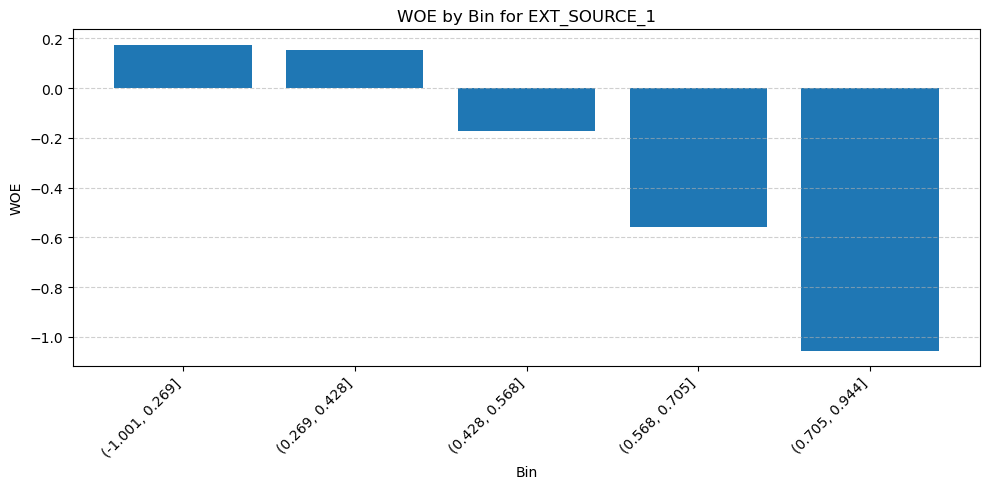

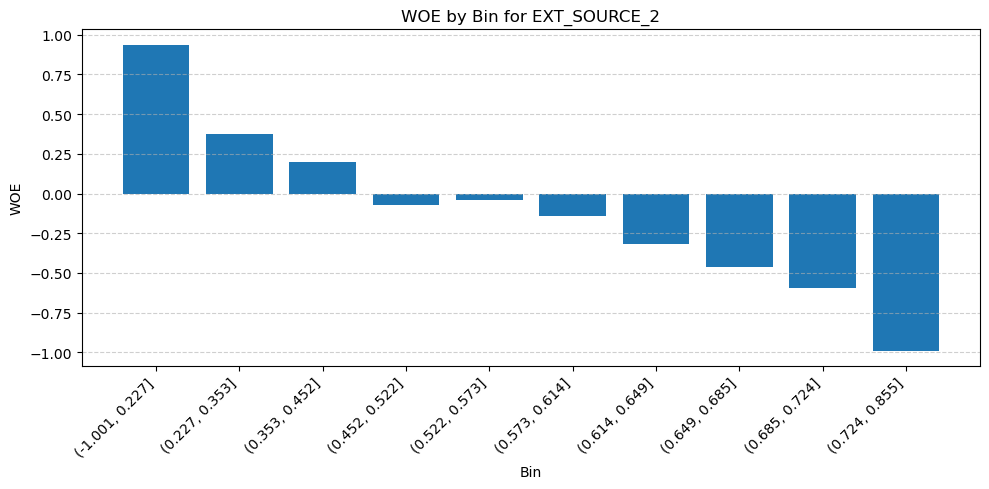

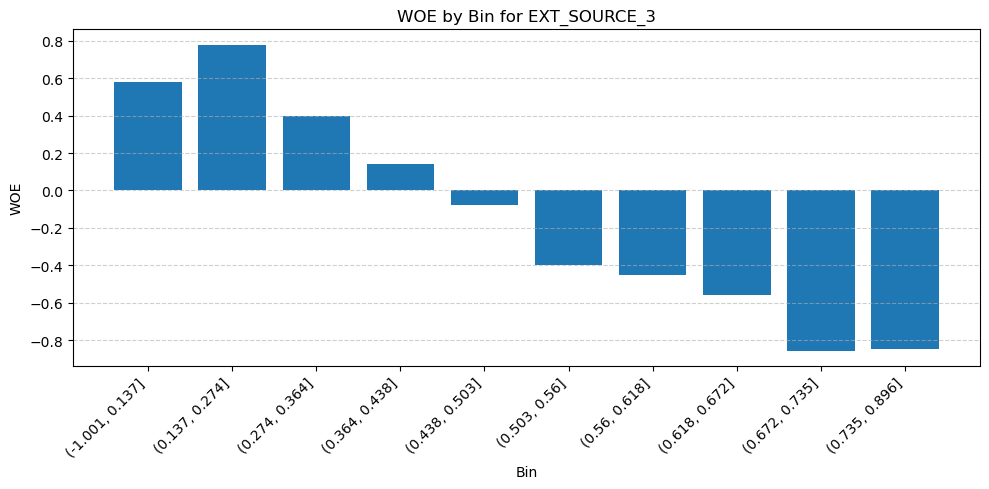

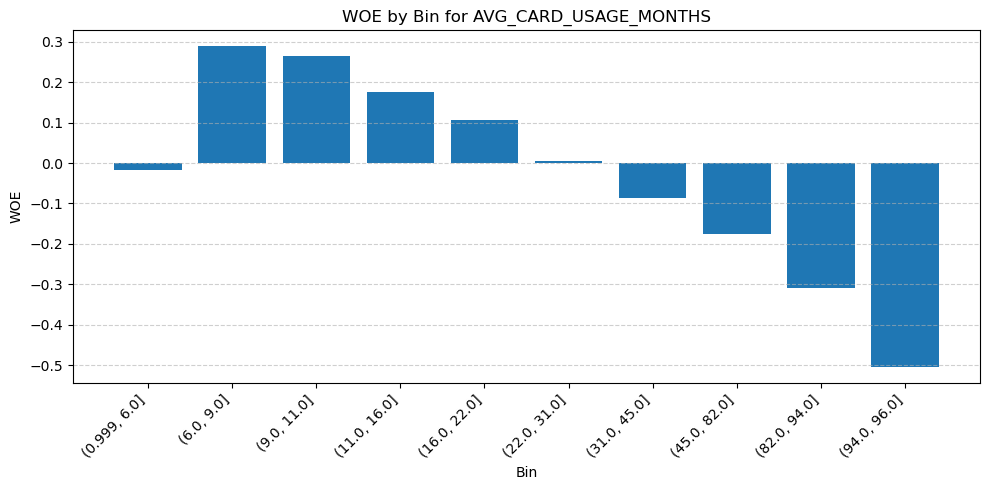

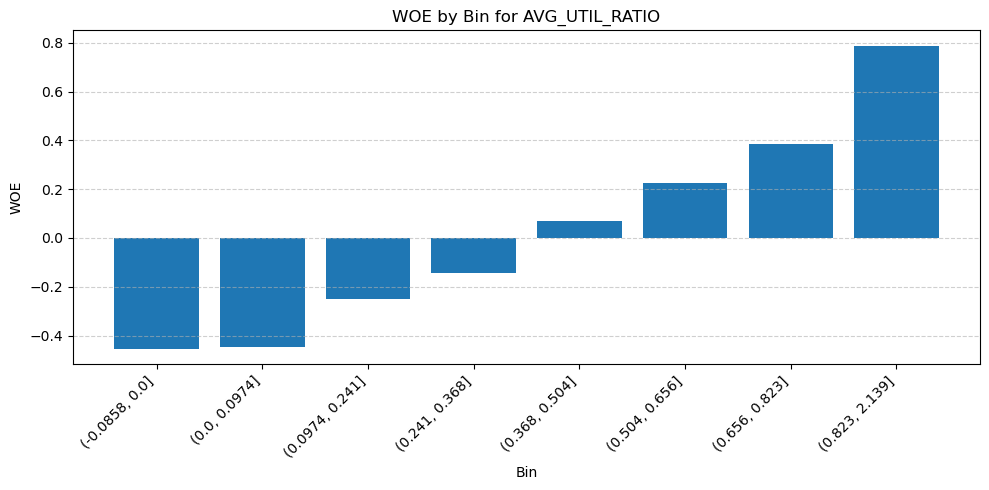

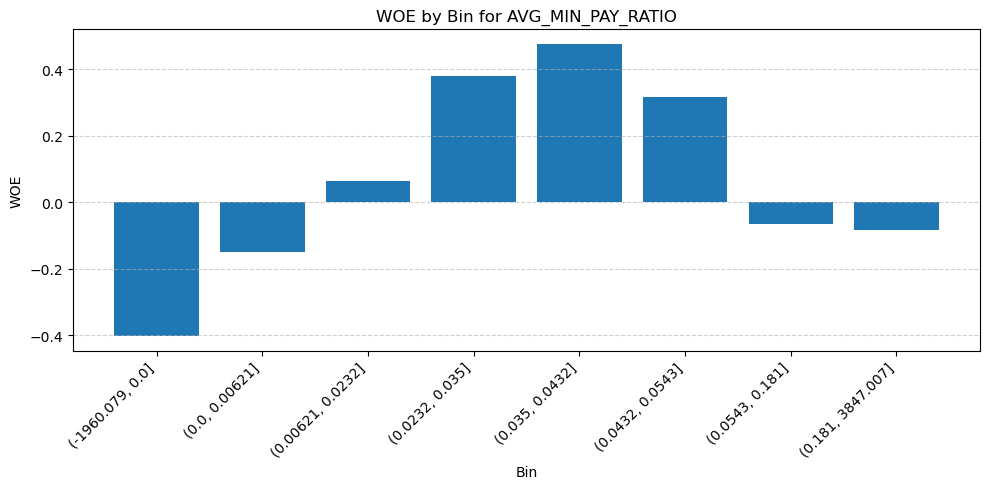

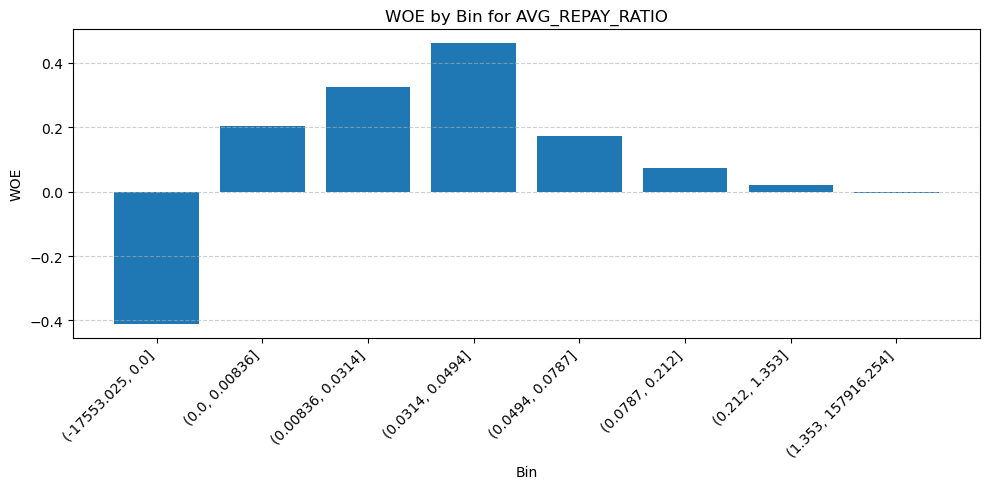

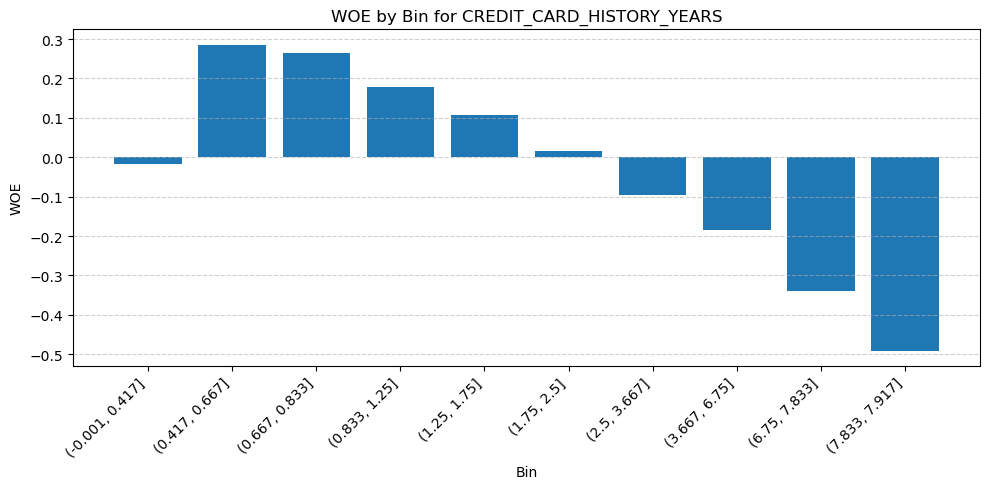

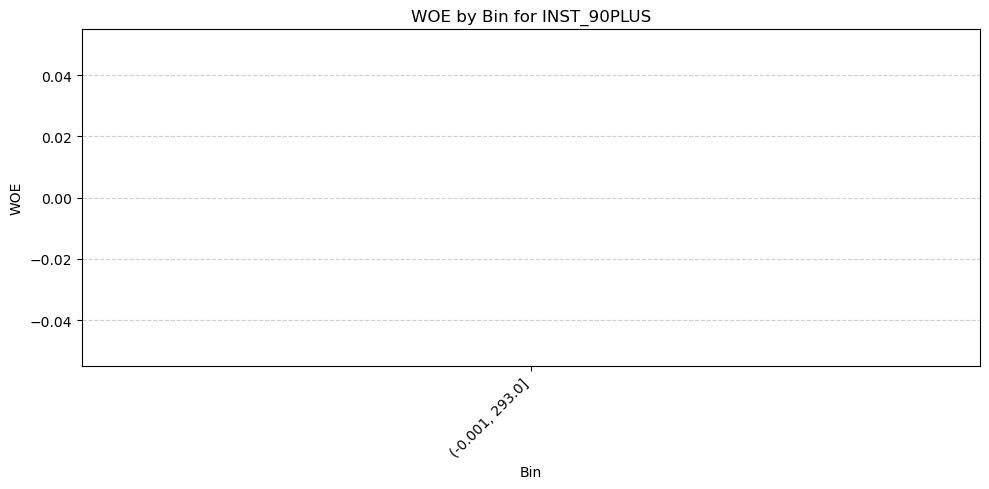

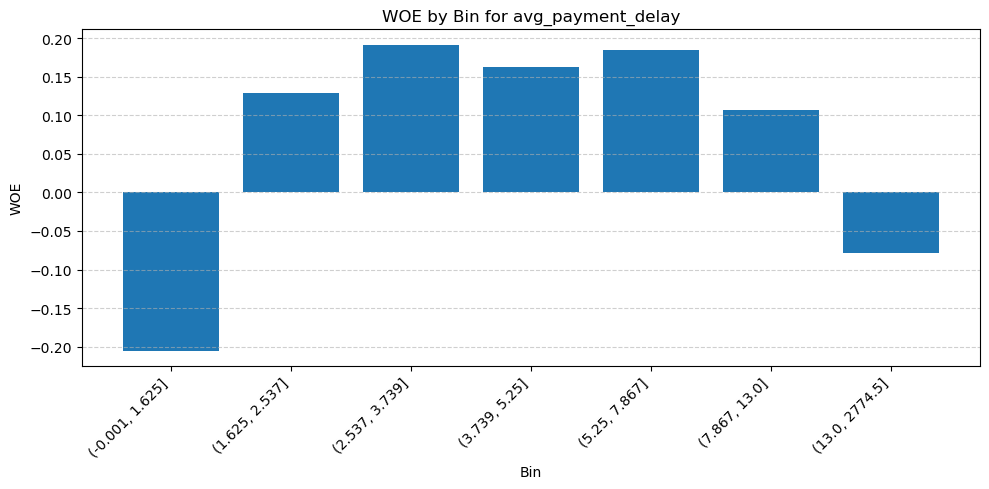

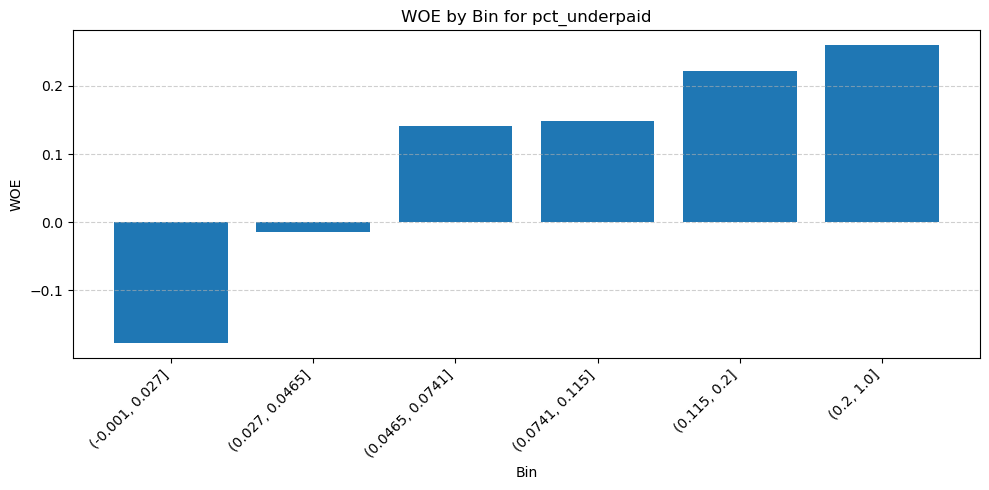

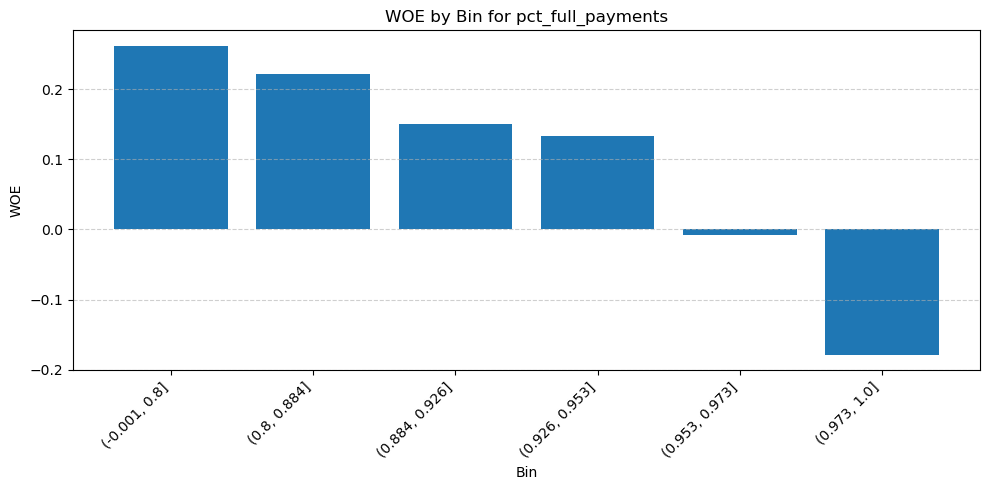

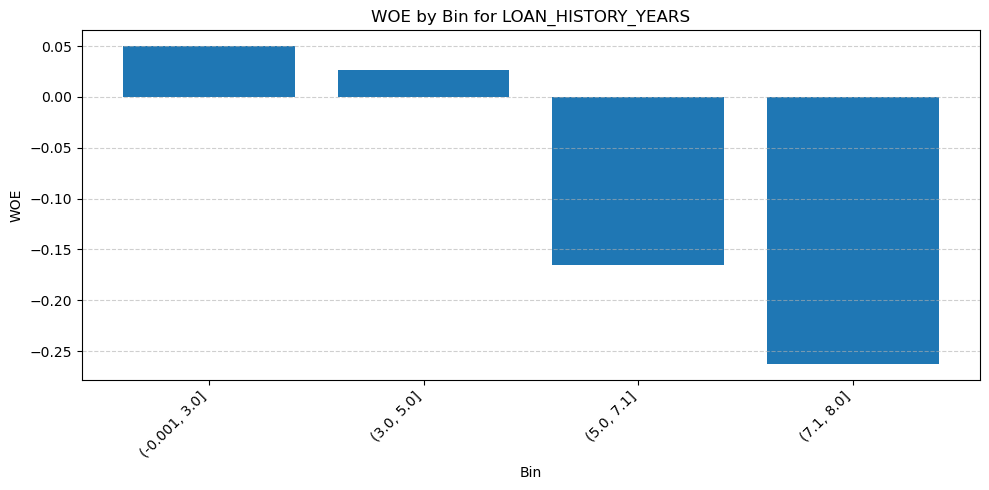

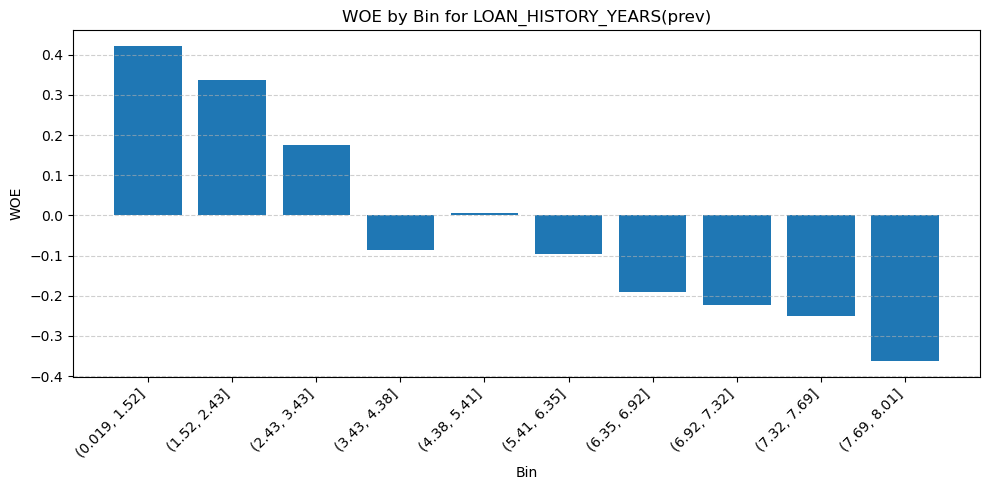

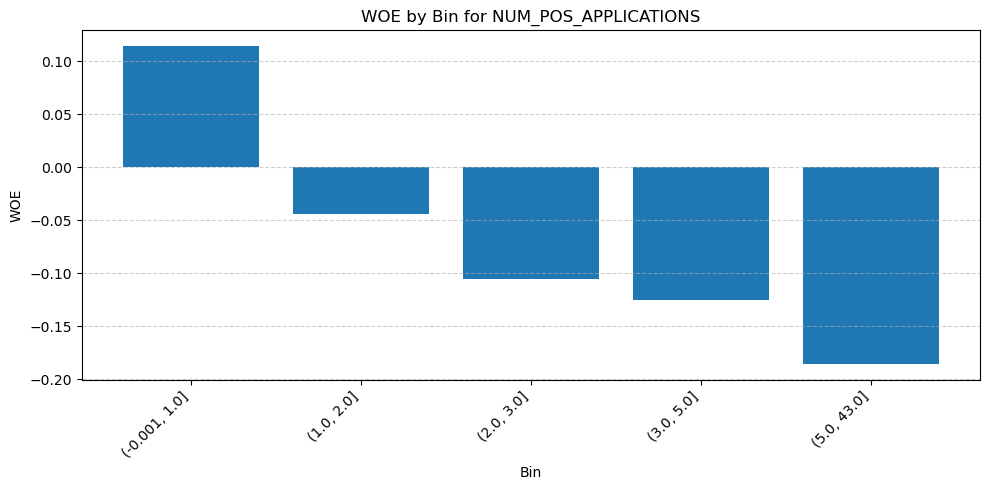

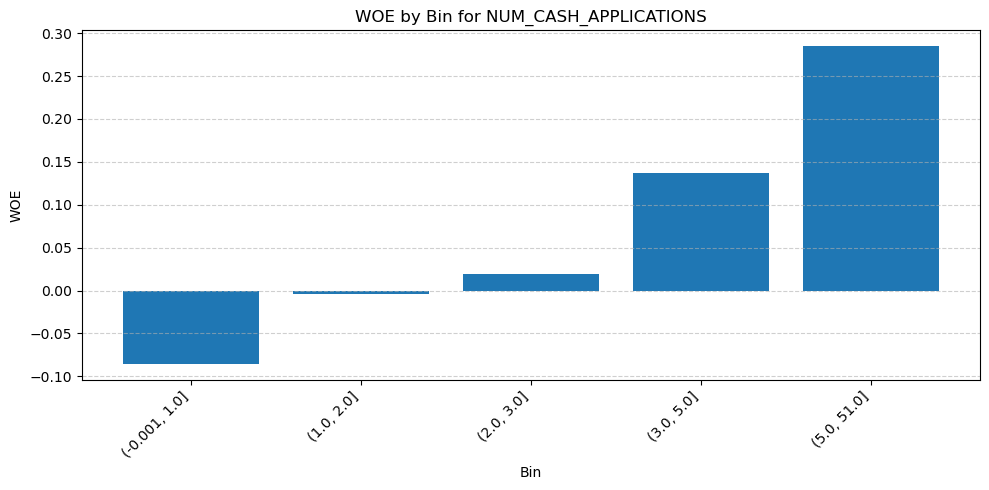

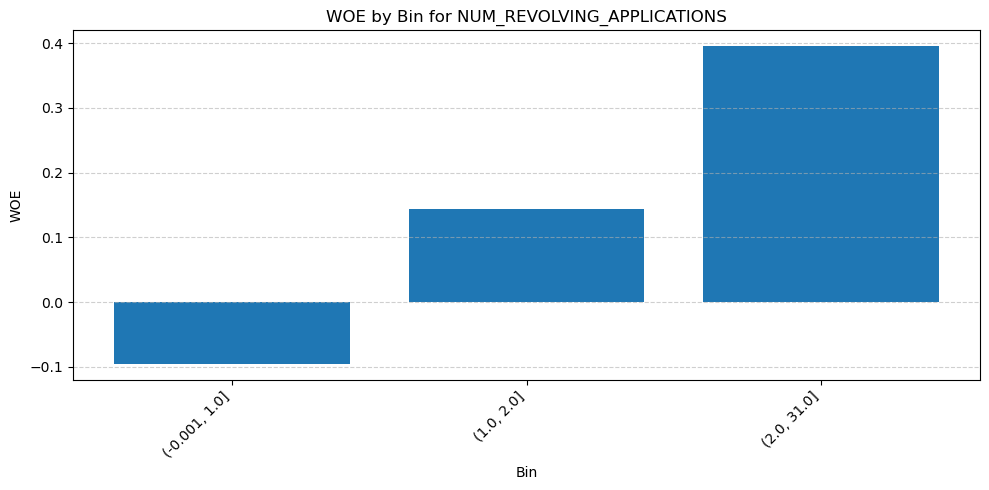

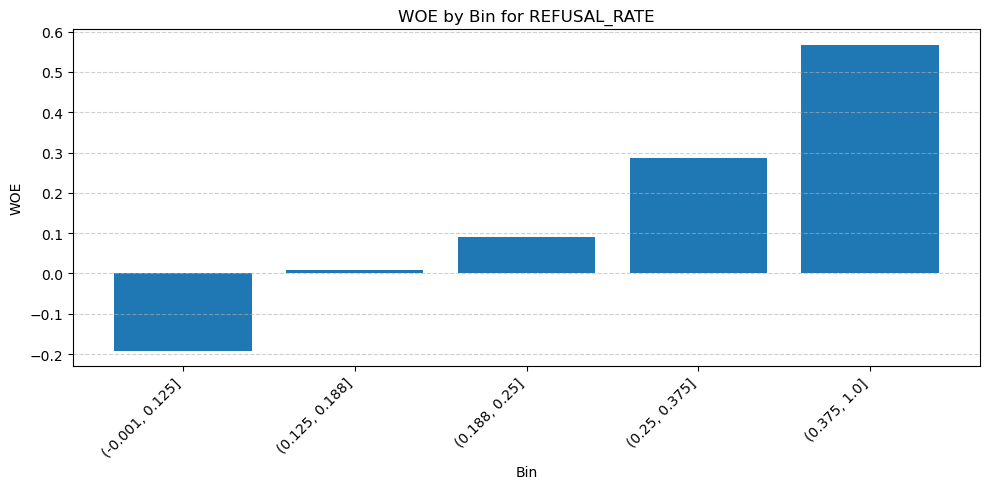

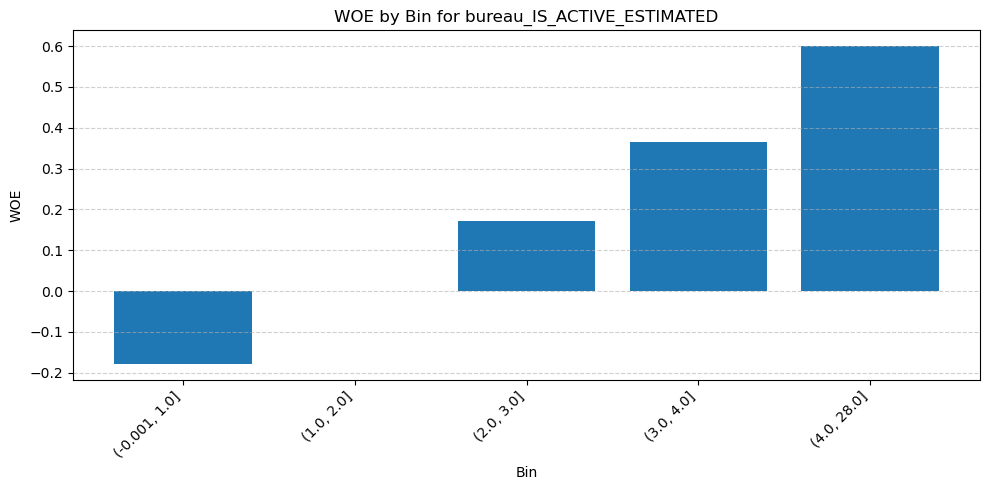

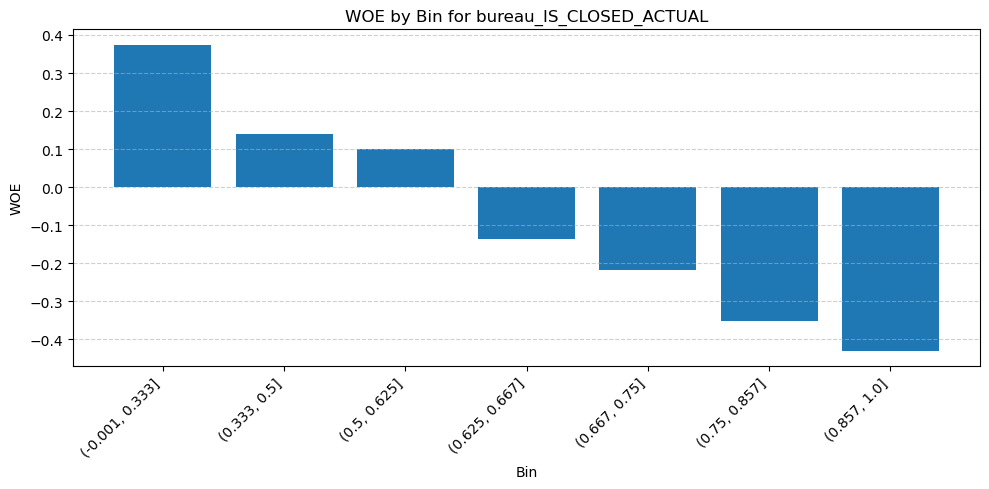

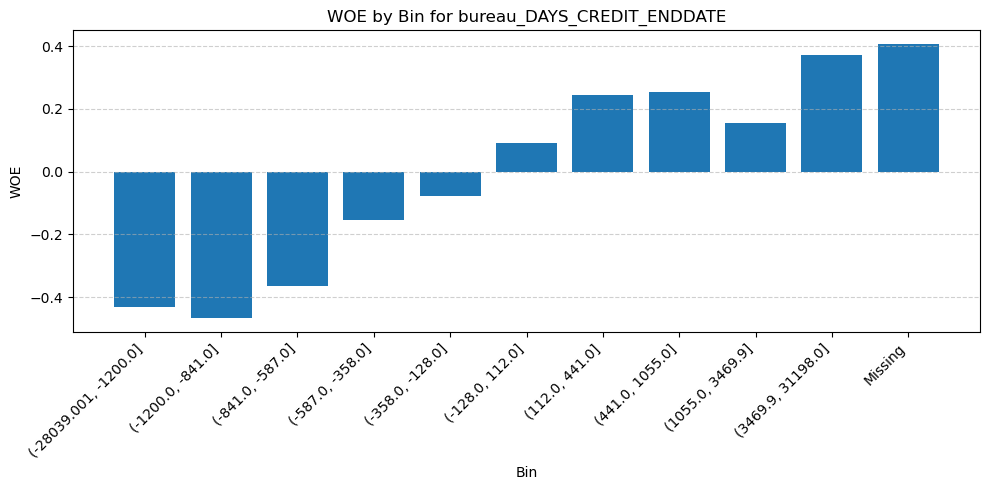

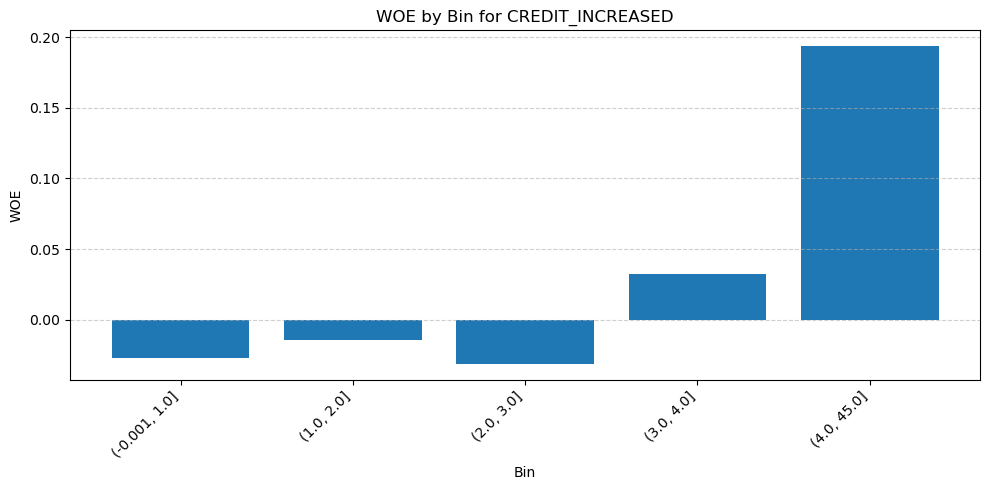

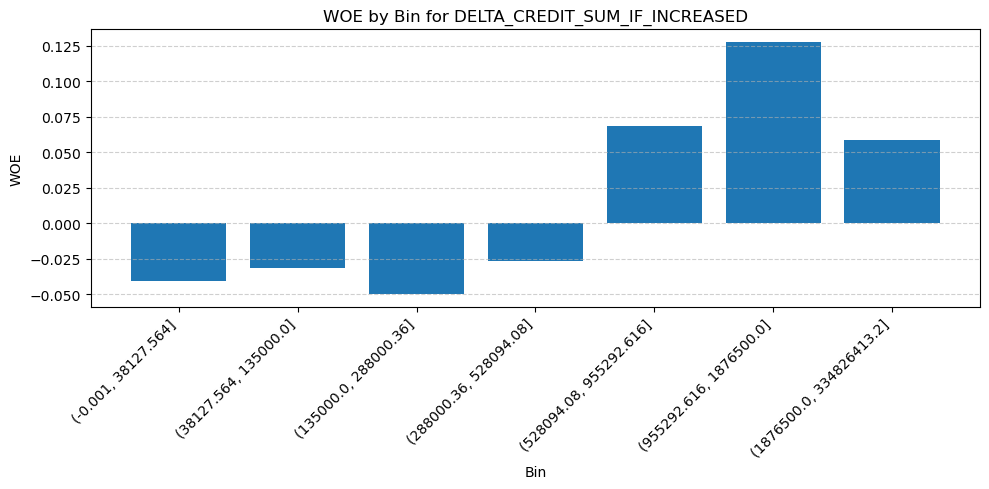

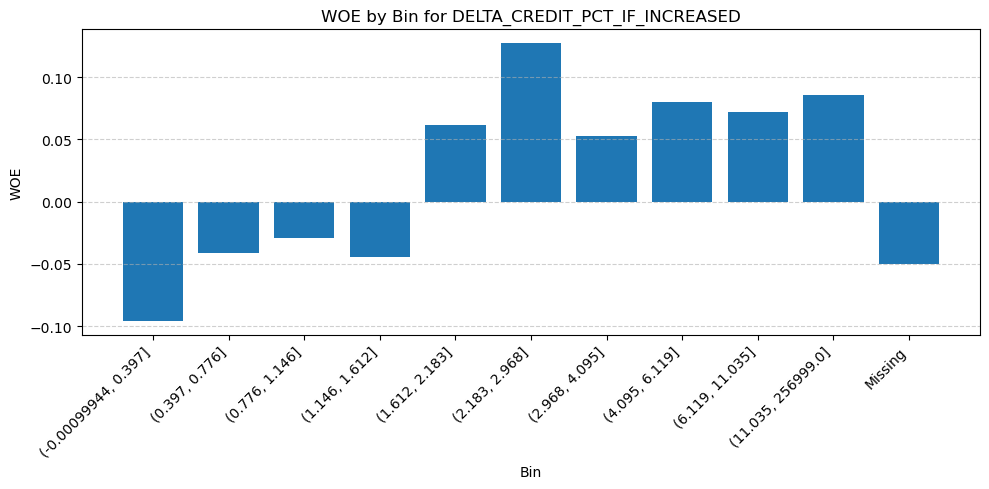

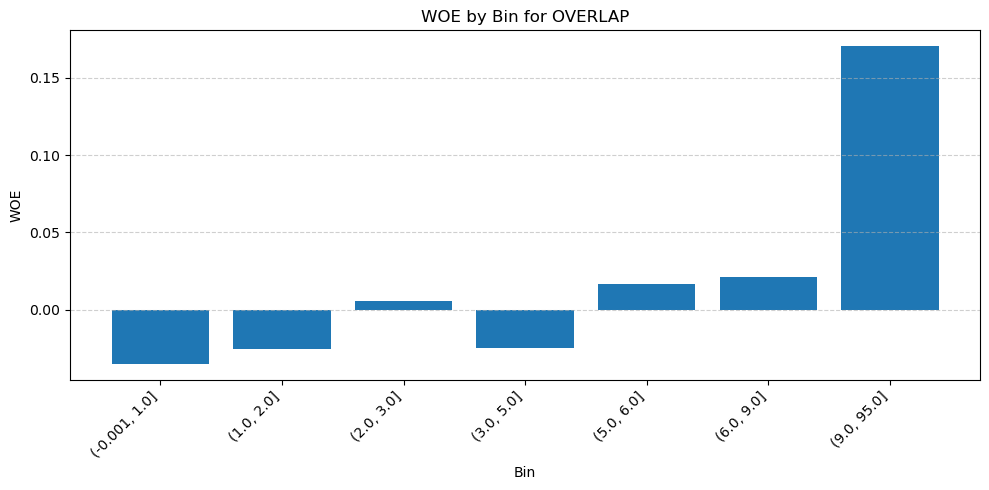

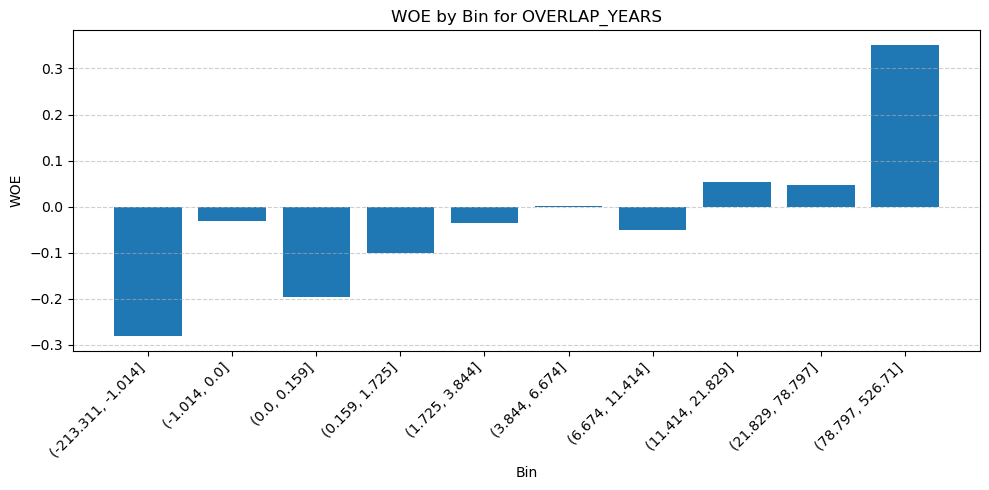

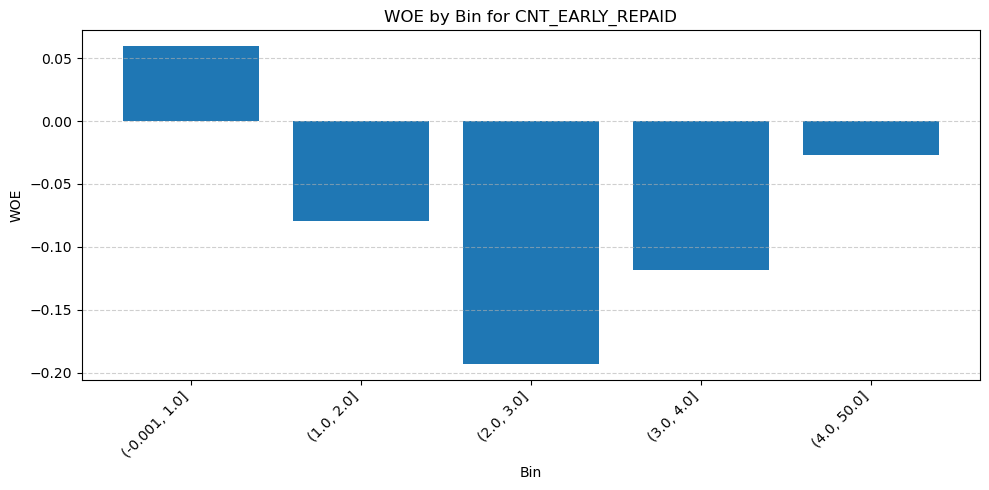

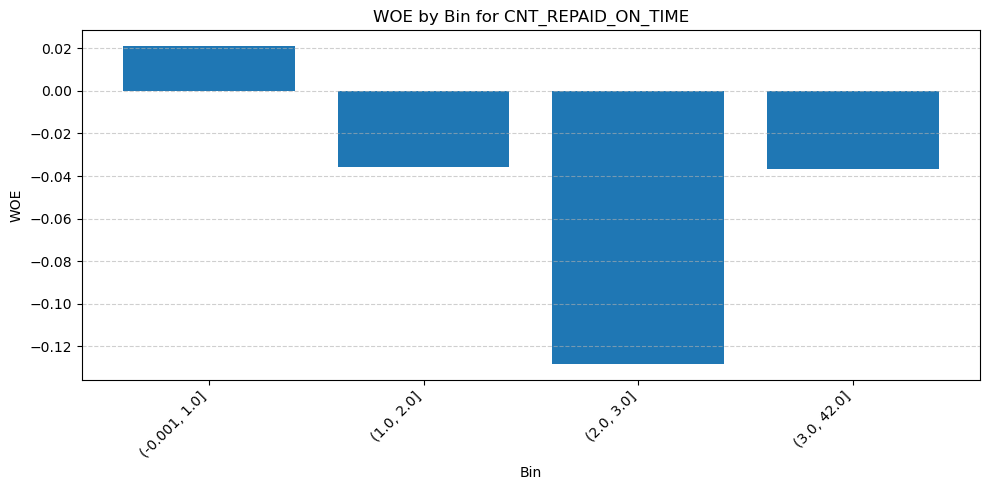

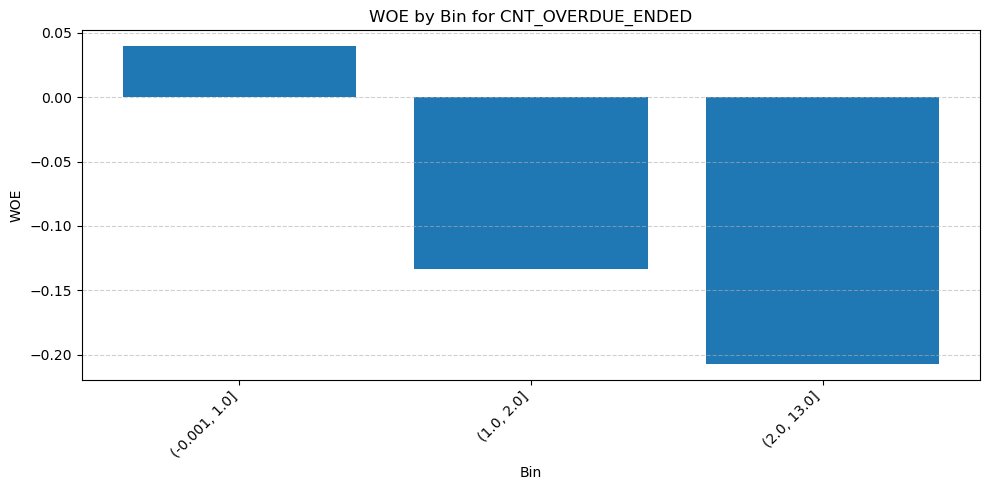

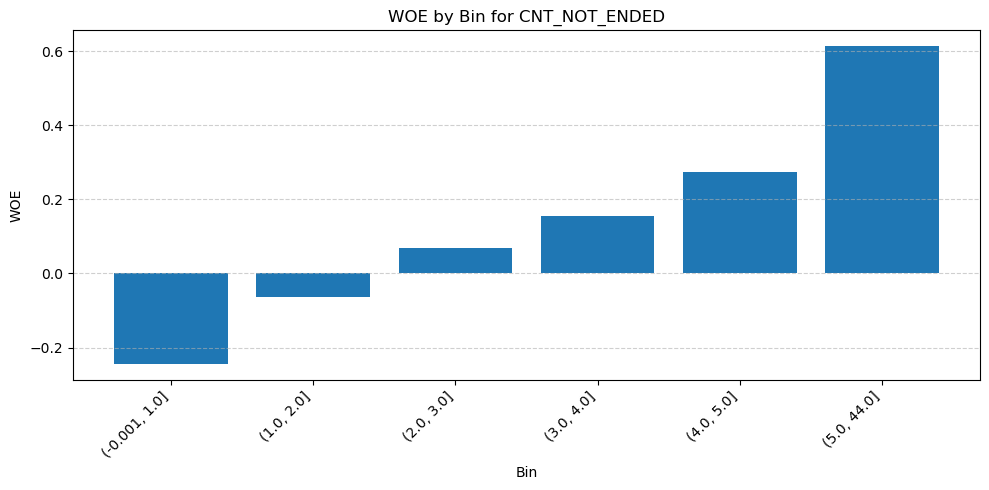

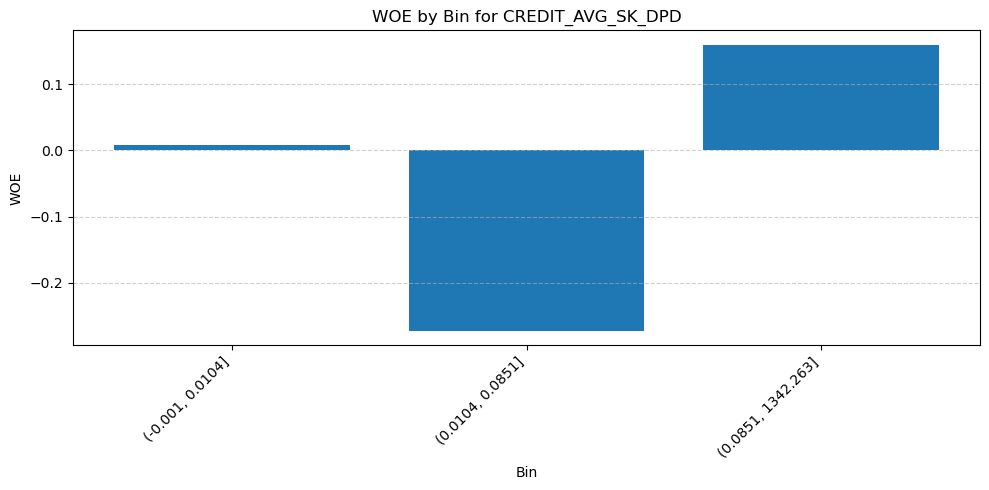

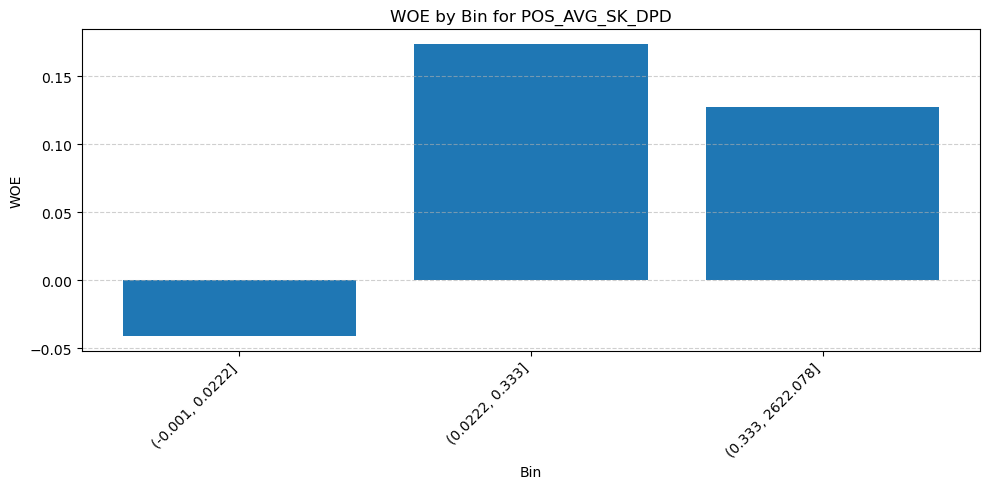

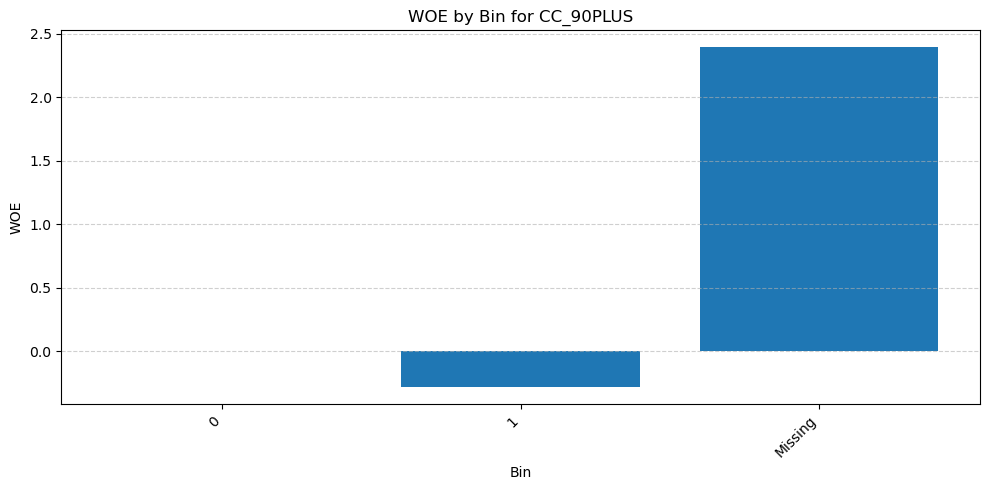

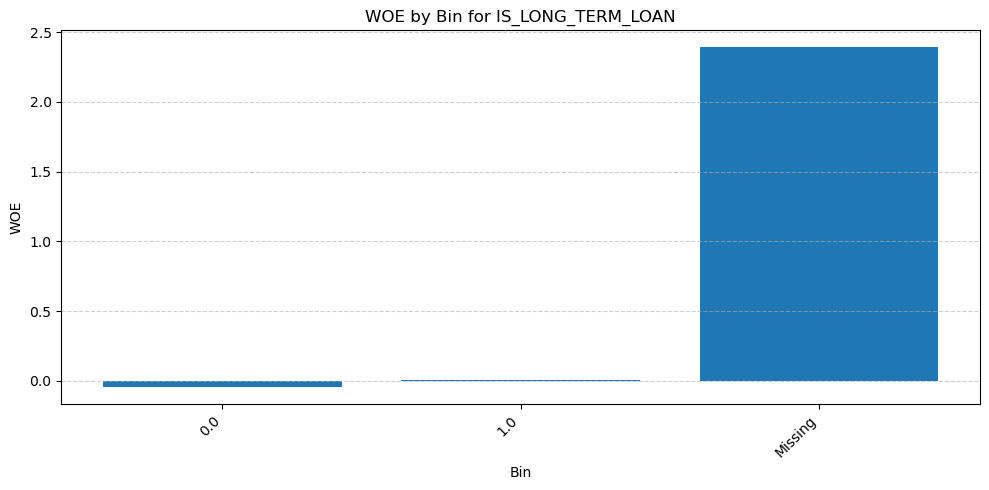

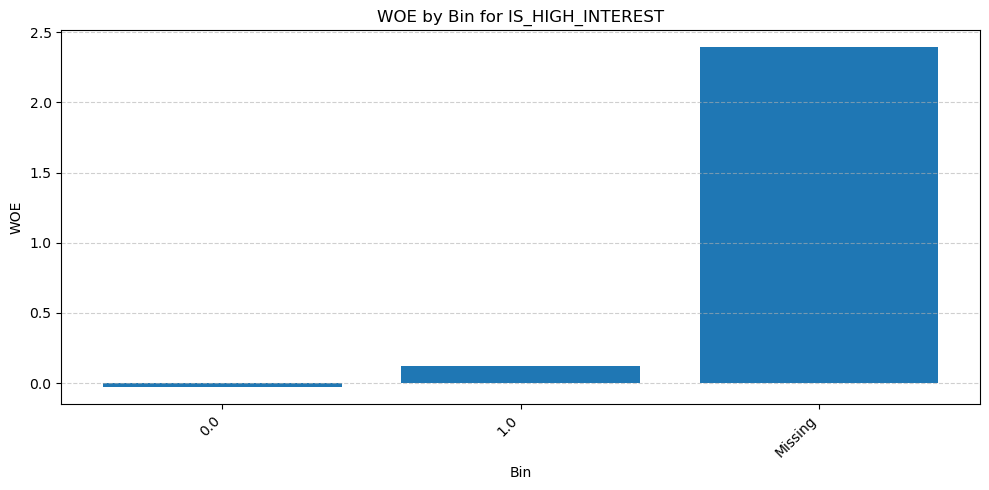

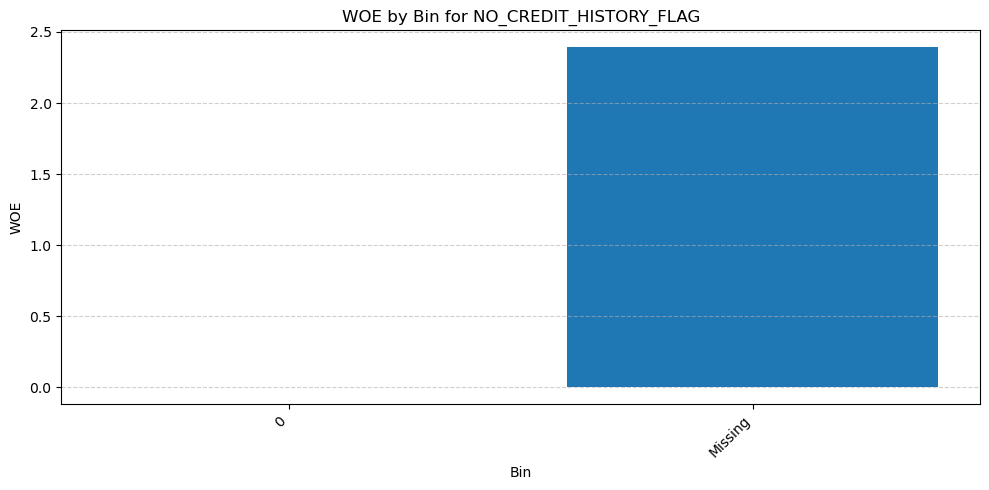

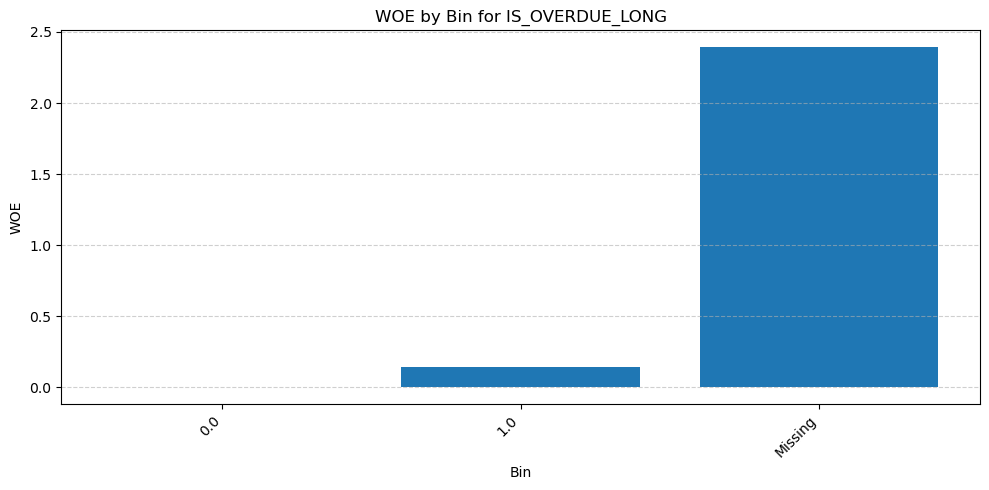

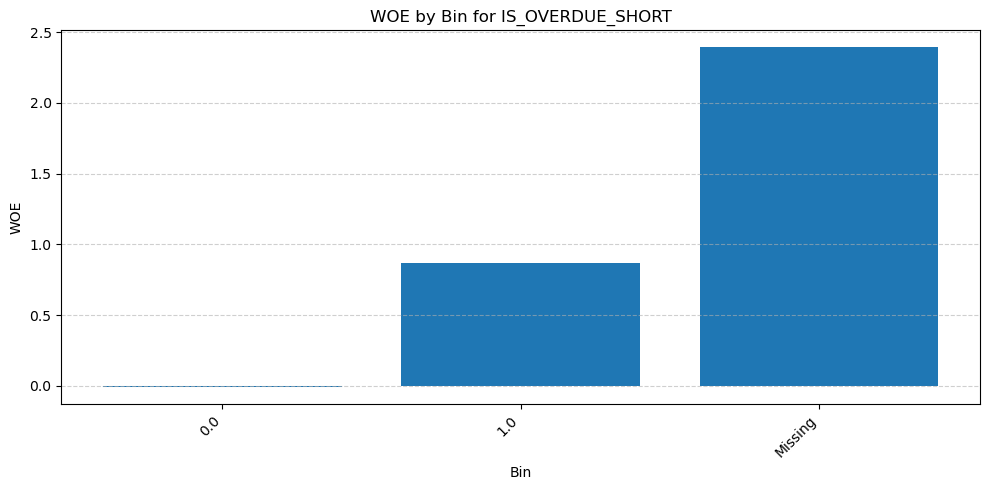

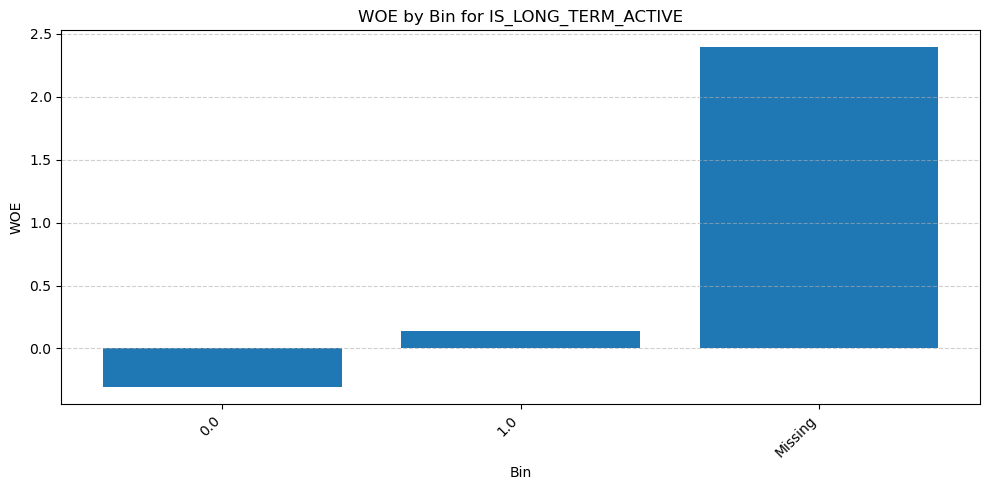

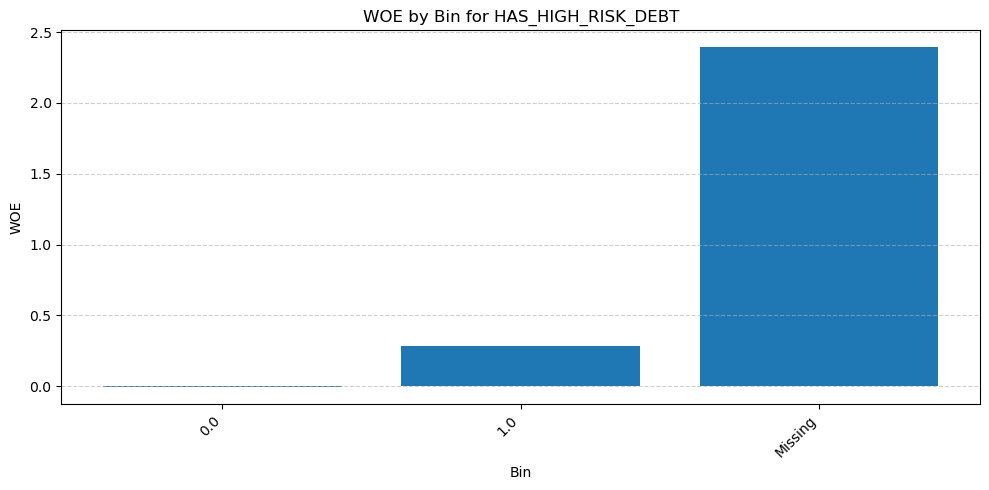

In [58]:
plot_all_woe_display(woe_all_variables)